In this machine learning problem, we are predicting whether a person has diabetes or not.

PIMA are a group of people in Indian. They are immigrants with a high chance of having type 2 diabetes.

characteristics of this dataset
the dataset has 7 features.
The patients here are female.
supervised problem

We will use logistic regression algorithm to classify.





# Getting the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [5]:
pimadata = pd.read_csv(r"C:\Users\hp\Downloads\diabetes.csv")

In [6]:
pimadata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory data analysis

In [7]:
pimadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#no missing data
len(pimadata)

768

In [9]:
pimadata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#all columns are in numeric type
pimadata.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#select the features for prediction
columnlist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x_dataset = pimadata[columnlist]
y_dataset = pimadata.Outcome

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

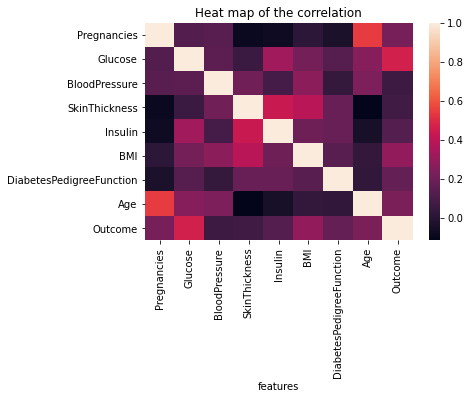

In [36]:
#show the correlation between the data
pimadata_corr = pimadata.corr()
sns.heatmap(pimadata_corr)
plt.title("Heat map of the correlation")
plt.xlabel("features")
plt.ylabel

# Split and train the model

In [13]:
#split the dataset

X_train, X_test, y_train, y_test = train_test_split(x_dataset,y_dataset, test_size=0.2, random_state=42)

In [14]:
#logistic regression model

logisticreg = LogisticRegression()
logisticreg.fit(X_train,y_train)
y_prediction = logisticreg.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluate perfomance with confusion matrix

In [15]:
#evaluate the perfomance

from sklearn import metrics

cnf_mtx = metrics.confusion_matrix(y_test, y_prediction)
cnf_mtx

array([[78, 21],
       [18, 37]], dtype=int64)

Text(0.5, 257.44, 'predicted label')

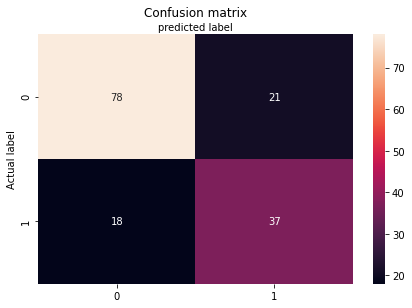

In [26]:
#visualize the confusion matrix

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_mtx), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("predicted label")

# Get the accuracy, precision ,recall, ROC and f1 score 

In [33]:

print("Accuracy: ", metrics.accuracy_score(y_test,y_prediction))
print("Precision: ", metrics.precision_score(y_test,y_prediction))
print("Recall: ",metrics.recall_score(y_test,y_prediction))
print(metrics.accuracy_score(y_test,y_prediction)*100, "%: chance of a person having diabetes")
print(y_prediction)

Accuracy:  0.7467532467532467
Precision:  0.6379310344827587
Recall:  0.6727272727272727
74.67532467532467 %: chance of a person having diabetes
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


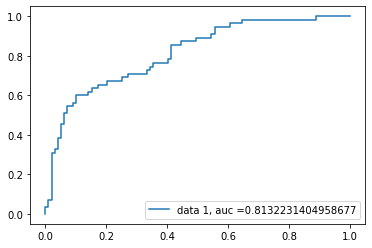

In [34]:
#ROC curve- receiver operating characteristics

y_probability = logisticreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_probability)
auc = metrics.roc_auc_score(y_test,y_probability)
plt.plot(fpr, tpr, label = "data 1, auc =" + str(auc))
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, y_prediction, average=None)

array([0.8       , 0.65486726])


# You can employ another model, then deploy the model